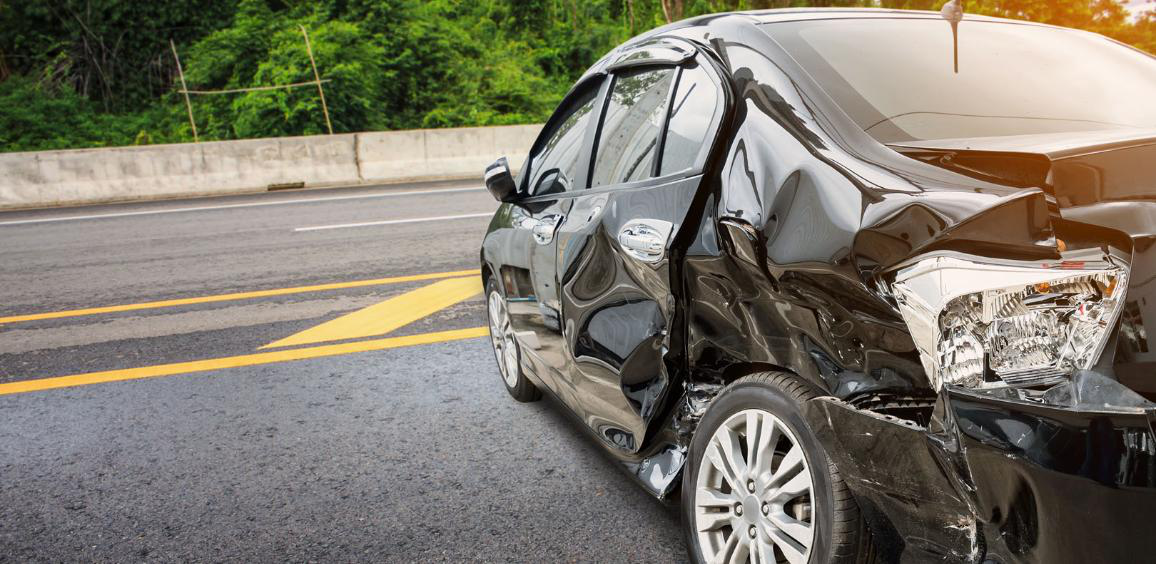

In [8]:
from PIL import Image
mac = Image.open('Python udemy\\20190308PHT30931-pl.jpg')
mac

# US Accidents Exploratory Data Analysis

## What is EDA?

Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling and thereby contrasts traditional hypothesis testing.


## About Dataset
The data set contains descriptive information about accidents. Which can be useful to Prevent accidents.
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset

This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2021 for the Contiguous United States. 

- SOURCE of Dataset - Kaggle

## Overview of Data

### Read the Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
#os.chdir('/kaggle/input/us-accidents')
#os.listdir()
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

## Data Description and information

In [6]:
print('length of dataframe :',len(df))
print('number of columns:',df.shape[1])
df

length of dataframe : 2845342
number of columns: 47


ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

### Lets see what sort datatypes we have.

In [5]:
k = df.dtypes
k = k.reset_index()
k = k.set_index('index')
k.columns = ['Dtype']
k.T


index      ID Severity Start_Time End_Time Start_Lat Start_Lng  End_Lat  \
Dtype  object    int64     object   object   float64   float64  float64   

index  End_Lng Distance(mi) Description  ... Roundabout Station  Stop  \
Dtype  float64      float64      object  ...       bool    bool  bool   

index Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
Dtype            bool           bool         bool         object   

index Civil_Twilight Nautical_Twilight Astronomical_Twilight  
Dtype         object            object                object  

[1 rows x 47 columns]

### Counts of Datatypes

In [6]:
dtype_description = df.dtypes.reset_index()
dtype_description.columns = ['columns','dtype']
dtype_description = dtype_description.groupby('dtype').aggregate('count').reset_index()
countofdatatype = dtype_description.set_index('dtype')
countofdatatype

columns
dtype           
bool          13
int64          1
float64       13
object        20

### Description of numeric column

In [7]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

### Description of non - numeric column


In [16]:
nn_df = df.select_dtypes(exclude = np.number)
nn_df.describe()

ID           Start_Time             End_Time  \
count   2845342              2845342              2845342   
unique  2845342              1959333              2351505   
top         A-1  2021-01-26 16:16:13  2021-11-22 08:00:00   
freq          1                  214                   88   

                                              Description   Street     Side  \
count                                             2845342  2845340  2845342   
unique                                            1174563   159651        3   
top     A crash has occurred causing no to minimum del...   I-95 N        R   
freq                                                 7978    39853  2353309   

           City       County    State  Zipcode  ... Roundabout  Station  \
count   2845205      2845342  2845342  2844023  ...    2845342  2845342   
unique    11681         1707       49   363085  ...          2        2   
top       Miami  Los Angeles       CA    91761  ...      False    False   
freq     106966       234122   795868     6162  ...    2845219  2777347   

           Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
count   2845342         2845342        2845342      2845342        2842475   
unique        2               2              2            1              2   
top       False           False          False        False            Day   
freq    2794942         2843630        2580079      2845342        1811935   

       Civil_Twilight Nautical_Twilight Astronomical_Twilight  
count         2842475           2842475               2842475  
unique              2                 2                     2  
top               Day               Day                   Day  
freq          1929103           2063472               2176983  

[4 rows x 33 columns]

In [9]:
print('Count of Non-Numeric column :')
print(len(nn_df.columns))
print('\n')

Count of Non-Numeric column :
33




Making different dataframe will increase the computational power and decrease the computational time while doing individual field analysis.
* Clearly we can see there are couple of NaN values present in some column

### Percentage of missing values per column

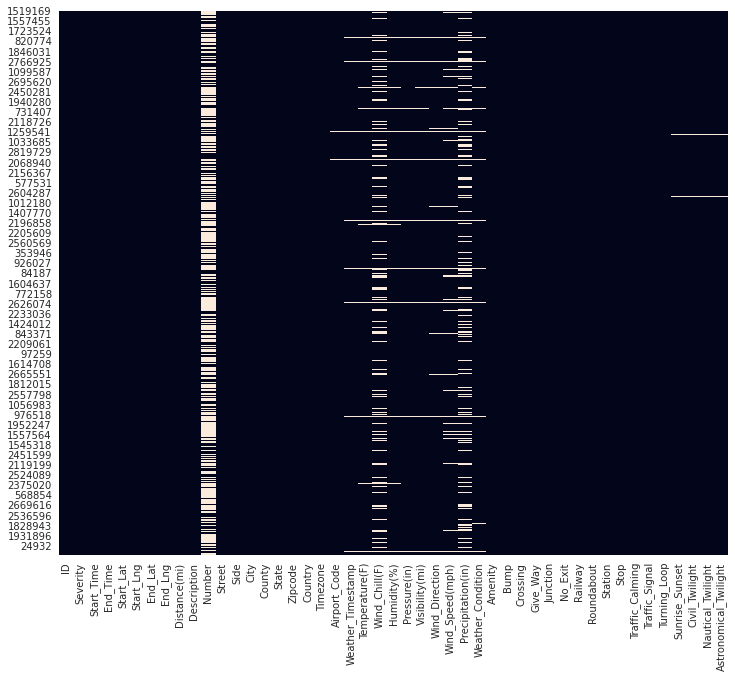

In [10]:
plt.figure(figsize =(12,10))
sns.heatmap(df.sample(frac =0.005,random_state = 1).isnull(), cbar = False)
plt.show()

In [13]:
percentage =(df.isna().sum()/df.shape[0])*100
percentage.sort_values(ascending = False).reset_index().T

0                  1              2                3   \
index     Number  Precipitation(in)  Wind_Chill(F)  Wind_Speed(mph)   
0      61.290031          19.310789      16.505678         5.550967   

                   4            5                  6               7   \
index  Wind_Direction  Humidity(%)  Weather_Condition  Visibility(mi)   
0            2.592834      2.56883           2.482514         2.47935   

                   8             9   ...         37       38       39  \
index  Temperature(F)  Pressure(in)  ...  Start_Lng  End_Lat  End_Lng   
0            2.434646      2.080593  ...        0.0      0.0      0.0   

                 40           41        42    43      44     45   46  
index  Distance(mi)  Description  Severity  Side  County  State   ID  
0               0.0          0.0       0.0   0.0     0.0    0.0  0.0  

[2 rows x 47 columns]

[Text(0.5, 1.0, 'Percent of null values')]

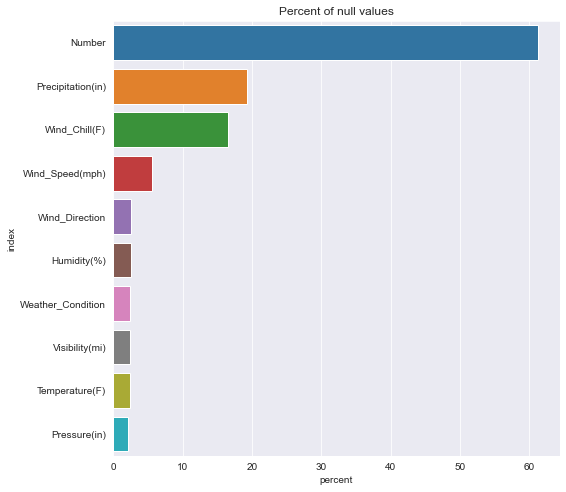

In [14]:
missing = percentage.sort_values(ascending = False).reset_index().set_index('index')
missing.columns = ['percent']
missing = missing[missing>0]
plt.figure(figsize = (8,8))
sns.barplot(data = missing.head(10),x='percent',y=missing.head(10).index).set(title='Percent of null values')

we find -
* we are missing more than 50% of data in 'Number' column. We should delete this column.
* other fields to have a sizeable portion. Not enough to make an analysis futile, of course, but sufficient to make us pay closer attention to what is going on here.
* Not all fields have missing values.



### deleting Number field

In [18]:
del df['Number']  # command will delete the Number column from the df

### Copy of Fields not containing any missing values

In [14]:
clean_fld_df = df[percentage[percentage == 0].index].copy() # df not containing any null-values

Above we have created a copy of dataframe of field that do not contain any missing values

## Exploratory Analysis and visualization
### INDEX
1. State
2. City
3. Start time
4. start longitude and start latitude
5. Temperature
6. Weather condition
7. wind chill 
8. precipitation
9. description(++)

### 1. State

In [11]:
print('Amount of null values in this Field is {}'.format(nn_df.State.isnull().sum()))    # Checking Null values in this column 

Amount of null values in this Field is 0


### counts how many accidents are there from each state.

In [19]:
state_df = nn_df.State.value_counts().reset_index()
state_df.columns = ['state','Accidents']
state_df['percent_counts'] = ((state_df['Accidents']/sum(state_df['Accidents']))*100)      # Counts and Percentage of Accident of each State
count_statewise = state_df.set_index('state').copy()
count_statewise.T

state                      CA             FL             TX             OR  \
Accidents       795868.000000  401388.000000  149037.000000  126341.000000   
percent_counts      27.970908      14.106846       5.237929       4.440275   

state                      VA             NY            PA            MN  \
Accidents       113535.000000  108049.000000  99975.000000  97185.000000   
percent_counts       3.990206       3.797399      3.513637      3.415582   

state                     NC            SC  ...           DE           RI  \
Accidents       91362.000000  89216.000000  ...  4842.000000  4451.000000   
percent_counts      3.210932      3.135511  ...     0.170173     0.156431   

state                    NH           NE           NM           ND  \
Accidents       3866.000000  3320.000000  2370.000000  2258.000000   
percent_counts     0.135871     0.116682     0.083294     0.079358   

state                    ME          WY          VT          SD  
Accidents       2193.000000  990.000000  365.000000  201.000000  
percent_counts     0.077073    0.034794    0.012828    0.007064  

[2 rows x 49 columns]

[Text(0.5, 1.0, 'statewise Number of accidents ')]

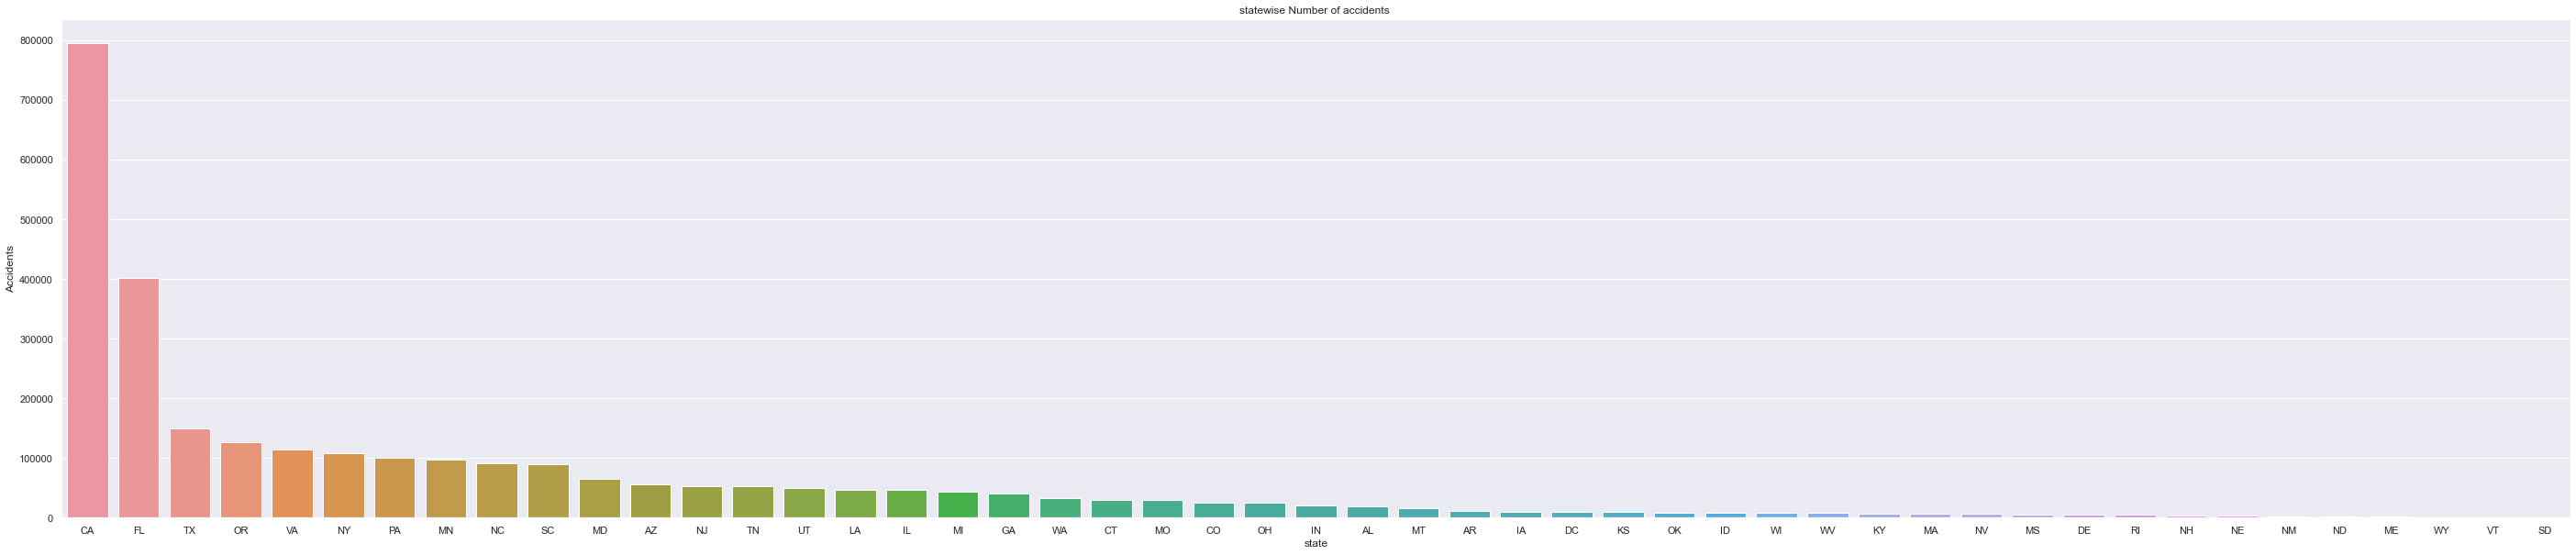

In [20]:
sns.set(rc = {'figure.figsize':(49,10)})
sns.barplot(data = state_df, x='state',y = 'Accidents').set(title = 'statewise Number of accidents ')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'statewise number of Accidents'}, xlabel='state', ylabel='Accidents'>

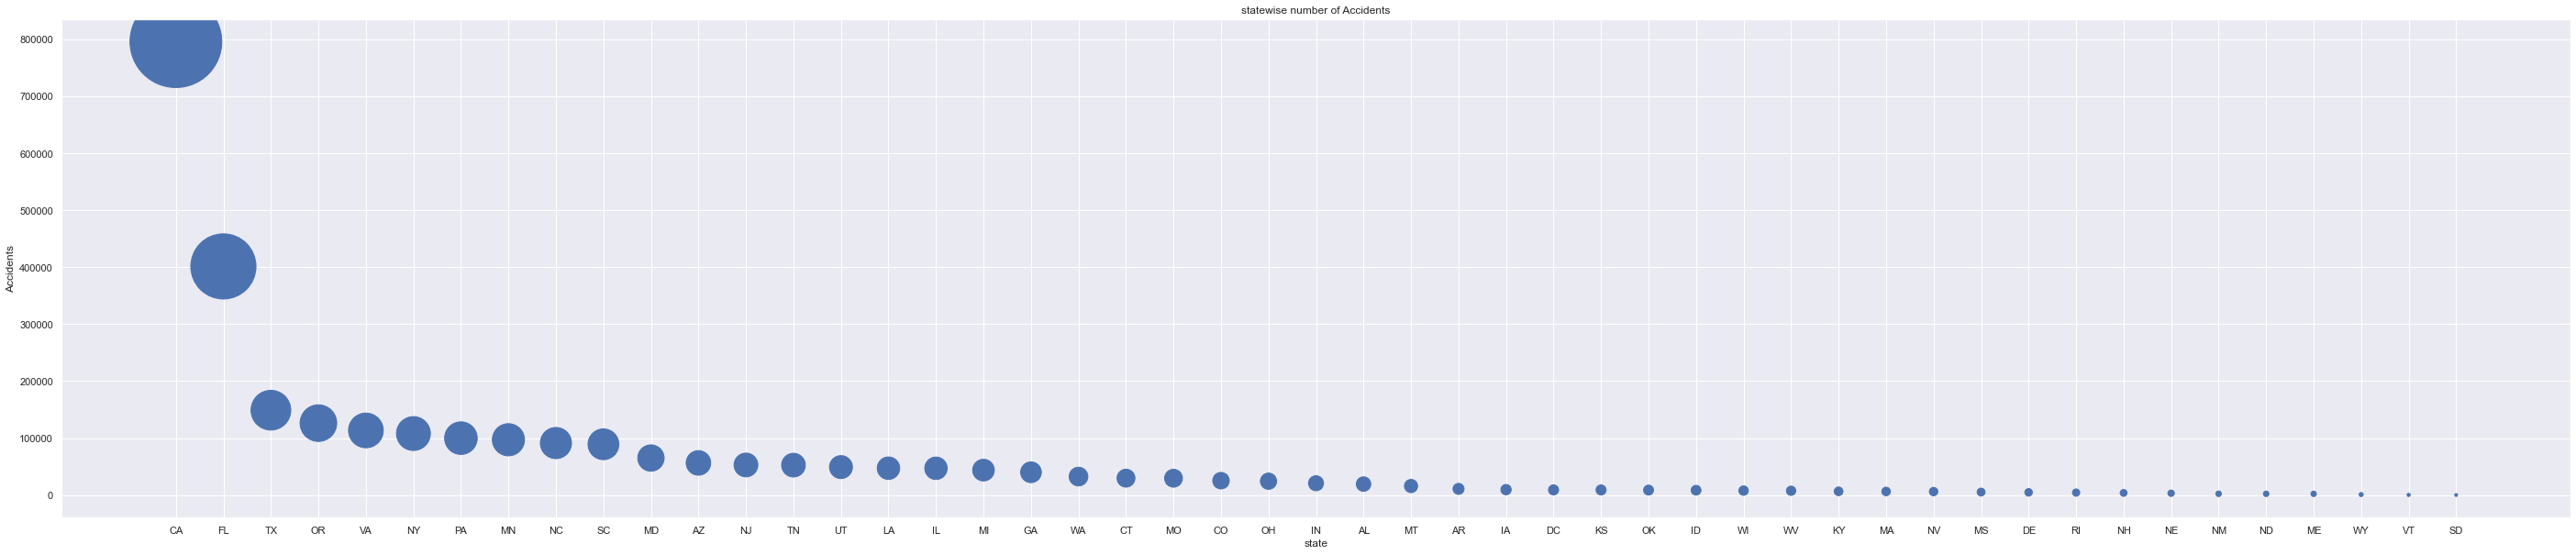

In [24]:
fig,ax = plt.subplots(figsize =(49,10))
norm_count = (state_df['Accidents']-min(state_df['Accidents']))/(max(state_df['Accidents'])-min(state_df['Accidents']))
state_df.plot(kind = 'scatter',x='state',y='Accidents',s = norm_count*10000 +10,ax = ax,title='statewise number of Accidents')

we find -
* 4 States of U.S that is california ,Florida ,Texas and Oregon accounts for More than Half of accidents.(51)
* Top 2 States of U.S Accounts for 42% of accidents

### 2. City

* city has no null value

### Number of Accidents per city

In [26]:
city_df = pd.crosstab(index = df['City'], columns = 'Accidents')
city_df.sort_values('Accidents',ascending = False,inplace = True)
city_df.unstack().unstack()

City        Miami  Los Angeles  Orlando  Dallas  Houston  Charlotte  \
col_0                                                                 
Accidents  106966        68956    54691   41979    39448      33152   

City       Sacramento  San Diego  Raleigh  Minneapolis  ...  Cochecton  \
col_0                                                   ...              
Accidents       32559      26627    22840        22768  ...          1   

City       Hilltown  Provo-Orem  Hill  Brook  Prospect Hill  Brooklyn Heights  \
col_0                                                                           
Accidents         1           1     1      1              1                 1   

City       Prosper  Proviso  Dacono  
col_0                                
Accidents        1        1       1  

[1 rows x 11681 columns]

In [ ]:
p.set_ylabel('counts of cities')

mean accidents per city :243.5754644294153
median accidents :20.0


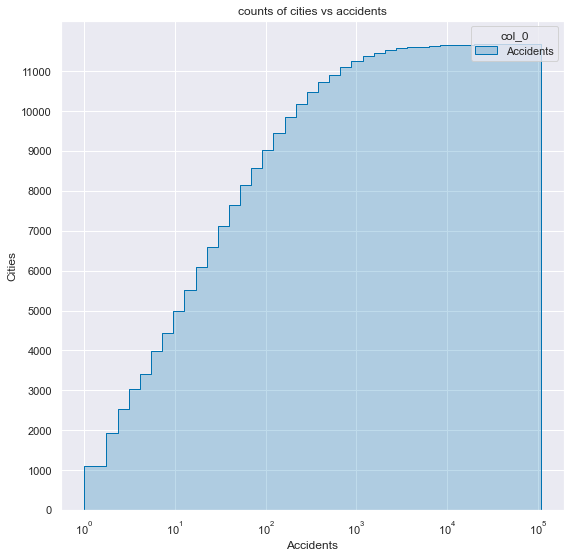

In [38]:
sns.set(rc = {'figure.figsize':(9,9)},palette ='colorblind')
p = sns.histplot(city_df,log_scale = True,cumulative = True,fill = True,element ='step').set(title = 'counts of cities vs accidents',xlabel = 'Accidents',ylabel='Cities')
plt.yticks(np.arange(0,12000,1000))
means_city = city_df.mean()
median_city = city_df.median()
print('mean accidents per city :{}'.format(means_city.Accidents))                                                               # plot vertical lines of mean and meadian
print('median accidents :{}'.format(median_city.Accidents))

This graph gives us insight into to the counts of cities under number of accidents

<AxesSubplot:title={'center':'Top 20 Cities'}, xlabel='city', ylabel='Accidents'>

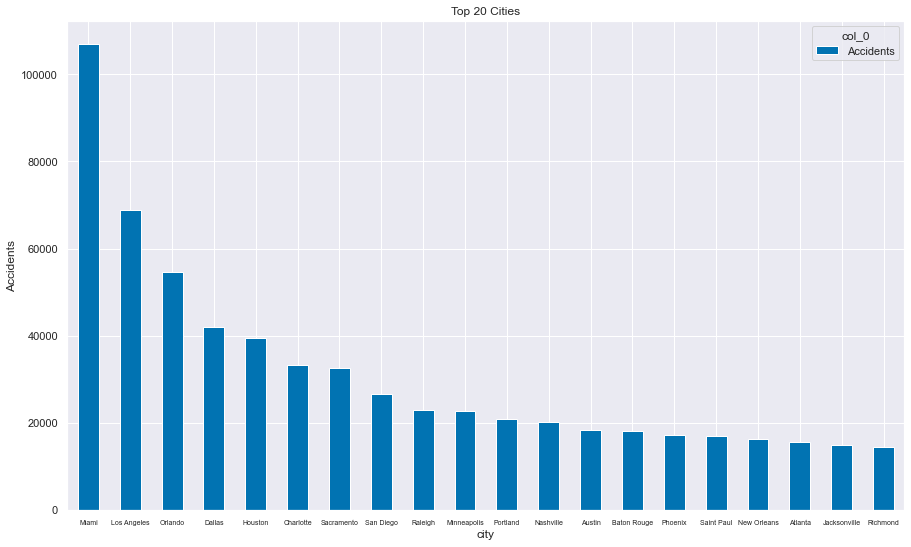

In [39]:
plot = city_df.head(20).plot(kind = 'bar',figsize = (15,9),ylabel = 'Accidents',xlabel = 'city',rot= 0,title ='Top 20 Cities')
plot.set_xticklabels(plot.get_xticklabels(),fontsize = 7)
plot

we find -

In [22]:
high_accident_cities = city_df[city_df['Accidents']>=500]
low_accident_cities = city_df[city_df['Accidents']<500]
print('Percentage of cities having accidents more than 500 :\n')
print(len(high_accident_cities)/len(city_df)*100)
print('\n')
print('Percentage of low accident(less than 500) cities:\n')
print(len(low_accident_cities)/len(city_df)*100)
print('\n')
print('Number of cities having 500 or more accident :\n')
print(sum(city_df['Accidents']>=500))
print('\n')
print('Number of cities having less than 500 accident :\n')
print(sum(city_df['Accidents']<500))

Percentage of cities having accidents more than 500 :

8.235596267442856


Percentage of low accident(less than 500) cities:

91.76440373255714


Number of cities having 500 or more accident :

962


Number of cities having less than 500 accident :

10719


### Cities based on severity (top 10 cities) 

<AxesSubplot:xlabel='City', ylabel='counts of accident'>

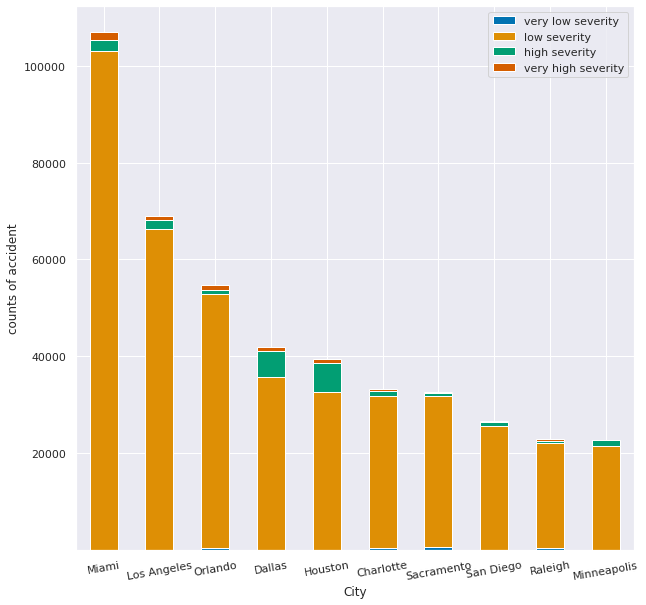

In [23]:
cities_sev = pd.crosstab(index = df.City,columns = df.Severity,margins = True)
cities_sev.columns = ['very low severity','low severity','high severity','very high severity','row_total']
sorted_df = cities_sev.sort_values(['row_total'],ascending = False)
cities_severity_top = sorted_df.iloc[1:11,0:4]
cities_severity_top.plot(kind = 'bar',figsize = (10,10),stacked = True,rot = 10,ylabel = 'counts of accident')

* 4628 cities reported less than or equal to 10 accidents in a span of FEB2016 to DEC2021

* 0.6 % (71) of cities have accidents more than or equal to 5000 in a span of FEB2016 to DEC2021

* most of the accident are of low severity it doesnt imply that most accident are of low severity since it is possible that most of the reported accident is of low severity

* Severity could be imbalanced field of data could be useful if we were to make inference.

### 2. Start_time

#### conversion to date time

In [24]:
df['Start_Time'].head(5)
df.Start_Time = pd.to_datetime(df.Start_Time)             # Conversion to datatype Datetime
df.Start_Time                                              

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

#### HOURS

Text(0.5, 0, 'hours')

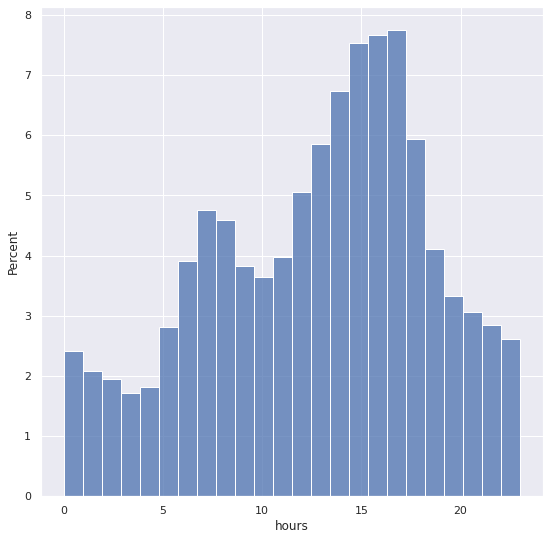

In [25]:
sns.set(rc = {'figure.figsize':(9,9)})
Time = sns.histplot(df.Start_Time.dt.hour,bins = 24,stat = 'percent')    # Distribution of Accidents as per hour (+0.00 - 23.59)
Time.set_xlabel('hours')                                                   

In [26]:
hours_of_accident = df.Start_Time.dt.hour
print('highest peak is :',hours_of_accident.mode())

highest peak is : 0    17
dtype: int64


we find -
* the above result shows that most of the accident happend around 17 (i.e 5 PM - 6PM of day ).This could be because most of the people leave from work at this time and hence more traffic could cause more accident.
* Also we could see there is increase in accident after 12 pm to 18 PM and after 18 PM i.e during 19 PM there is sudden decrease

#### DAYS OF WEEK

In [27]:
days_of_accident = df.Start_Time.dt.dayofweek
print(days_of_accident.unique())                                  # Extracting days of Week from Start time
print('\n')                                                         
print(days_of_accident)

[0 1 2 3 4 5 6]


0          0
1          0
2          0
3          0
4          0
          ..
2845337    4
2845338    4
2845339    4
2845340    4
2845341    4
Name: Start_Time, Length: 2845342, dtype: int64


In [28]:
df_daysofweek = pd.crosstab(index = days_of_accident, columns ='counts')       # Renaming Indexes  
df_daysofweek.index = ['mon','tue','wed','thu','fri','sat','sun']
df_daysofweek['percent'] = round((df_daysofweek['counts']/sum(df_daysofweek['counts']))*100)
df_daysofweek.T

mon       tue       wed       thu       fri       sat       sun
col_0                                                                        
counts   419821.0  443968.0  455037.0  463477.0  492074.0  311691.0  259274.0
percent      15.0      16.0      16.0      16.0      17.0      11.0       9.0

<AxesSubplot:>

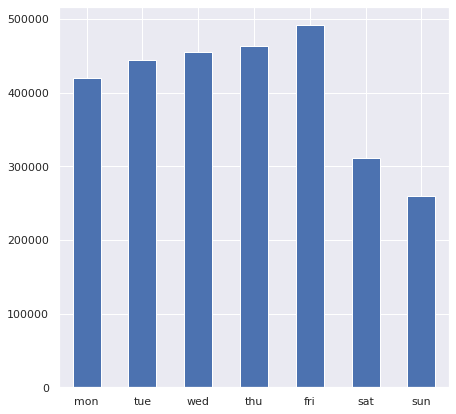

In [29]:
df_daysofweek['counts'].plot(kind ='bar',figsize = (7,7),rot = 0)  

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

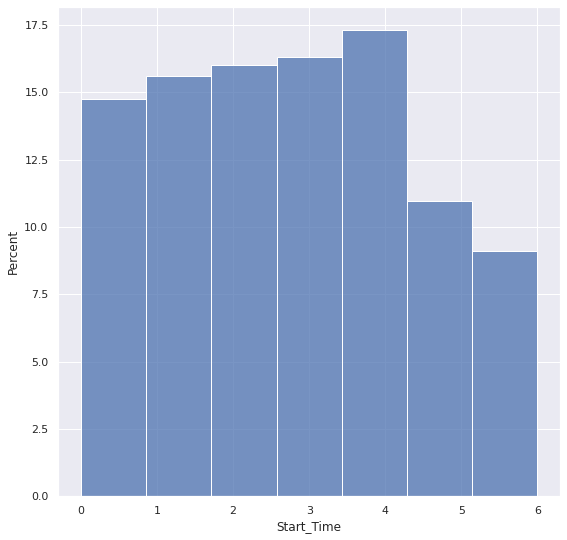

In [30]:
sns.histplot(days_of_accident,bins = 7,stat = 'percent')   # Distribution of Accidents weekday wise

we find-
* clearly there are less accidents in weekends
* Accidents Peaks on friday.

#### On weekend does the accident by hour is same as weekdays ?

#### WEEKENDS

Text(0.5, 0, 'hours')

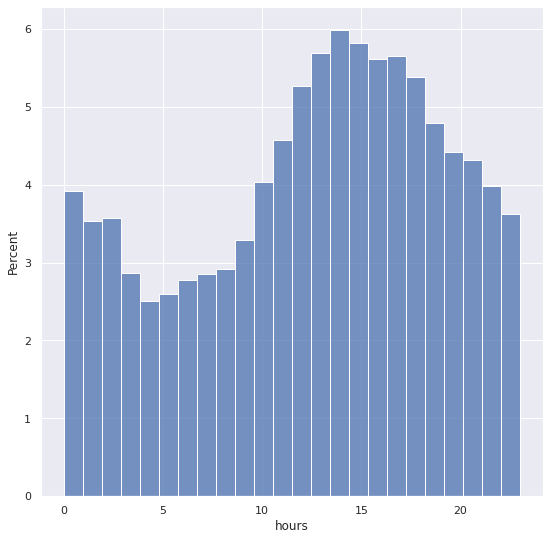

In [31]:
weekends = df.Start_Time[(days_of_accident == 5) | (days_of_accident == 6)]
wk_ends = sns.histplot(weekends.dt.hour, bins = 24,kde = False ,stat = 'percent')       # Distribution of accidents on weekends    
wk_ends.set_xlabel('hours')                                                        

#### WEEKDAYS

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

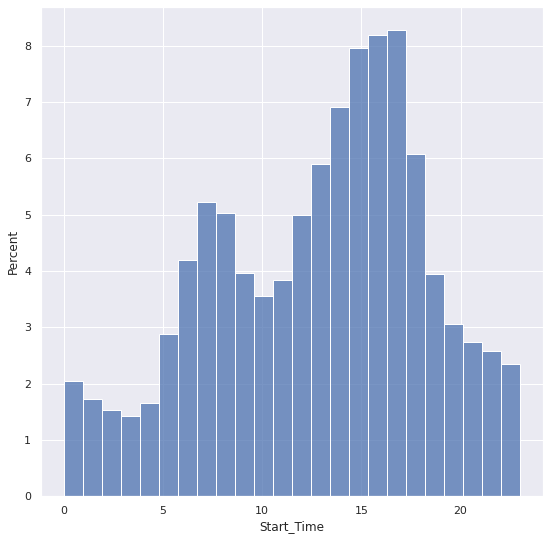

In [32]:
weekdays = df.Start_Time[days_of_accident < 5]
sns.histplot(weekdays.dt.hour,bins = 24,kde = False, stat = 'percent')     # Distribution of accidents on weekdays

In [33]:
print('Percentage of accdidents on weekends:')
print(len(weekends)/len(df)*100)
print('Percentage of accdidents on weekdays:')
print(len(weekdays)/len(df)*100)

Percentage of accdidents on weekends:
20.066656310559505
Percentage of accdidents on weekdays:
79.93334368944049


we find -
* SO clearly from above comparision we can see on weekend most accident occur around 3 PM noon whereas in weekdays its around 5PM - 6PM. 
* Also clearly there is spike in morning at weekdays which could be due to work time.

####  MONTHS

In [34]:
months_wise = df.Start_Time.dt.month
months_df = pd.crosstab(index = months_wise, columns = 'Accidents')
months_df.index = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
months_df['percent'] = round((months_df['Accidents']/sum(months_df['Accidents']))*100) 
months_df.T

jan       feb       mar       apr       may       jun  \
col_0                                                                   
Accidents  198365.0  194995.0  158224.0  171880.0  181944.0  226561.0   
percent         7.0       7.0       6.0       6.0       6.0       8.0   

                jul       aug       sep       oct       nov       dec  
col_0                                                                  
Accidents  159111.0  178670.0  241822.0  299131.0  360696.0  473943.0  
percent         6.0       6.0       8.0      11.0      13.0      17.0

([<matplotlib.patches.Wedge at 0x7f0dac127b90>,
 [Text(1.073722333981623, 0.2389986391364097, 'jan'),
  Text(0.8734678117138899, 0.6686209553250249, 'feb'),
  Text(0.5536807472421924, 0.9504933614356955, 'mar'),
  Text(0.17849969710802632, 1.0854205904313512, 'apr'),
  Text(-0.24827927499097732, 1.0716143903522175, 'may'),
  Text(-0.6905664964243577, 0.8562230515561863, 'jun'),
  Text(-0.9825808269831492, 0.4945047203466423, 'jul'),
  Text(-1.095214633482345, 0.10249344664969068, 'aug'),
  Text(-1.025177152927511, -0.3987628431981125, 'sep'),
  Text(-0.6234279524143301, -0.906276772376119, 'oct'),
  Text(0.1381982917278978, -1.091284212367929, 'nov'),
  Text(1.0394163680159634, -0.5996779251402403, 'dec')],
 [Text(0.5856667276263399, 0.1303628940744053, '7%'),
  Text(0.4764369882075762, 0.36470233926819534, '7%'),
  Text(0.30200768031392305, 0.5184509244194702, '6%'),
  Text(0.09736347114983253, 0.592047594780737, '6%'),
  Text(-0.13542505908598762, 0.5845169401921186, '6%'),
  Text(-0

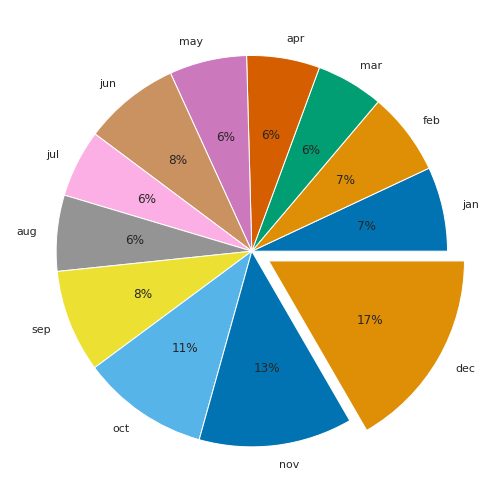

In [35]:
explode = tuple([0 if i!=11 else 0.1  for i in range(len(months_df['percent']))])
colors = sns.color_palette('colorblind')
plt.pie(months_df['Accidents'], labels = months_df.index , autopct = '%.0f%%',colors = colors,explode= explode)

<AxesSubplot:>

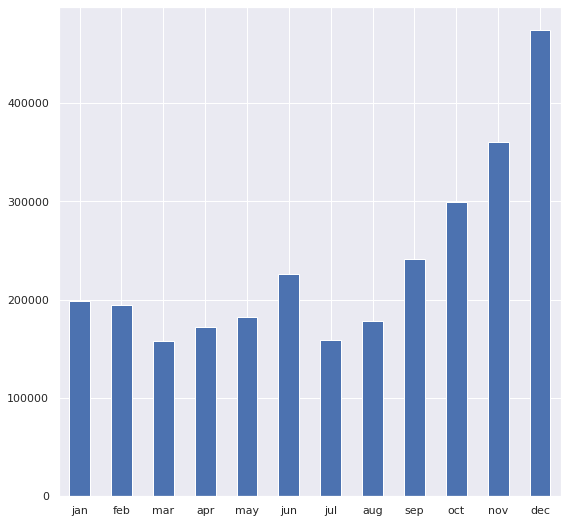

In [36]:
months_df['Accidents'].plot(kind = 'bar', figsize =(9,9),rot =0)

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

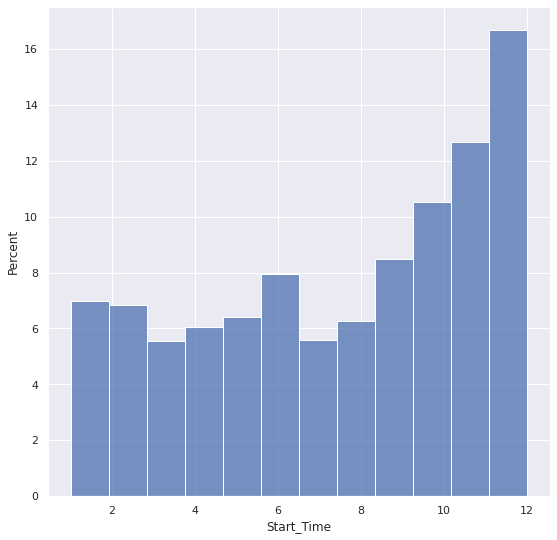

In [37]:
sns.histplot(months_wise,bins = 12,stat = 'percent')                  # Distribution of Accidents Month wise (percentage on y-scale)

we find -
* Clearly there is spike in last three months could be due to summer vacation in dec. 

#### YEAR WISE

In [38]:
years = df.Start_Time.dt.year
np.rint(years.value_counts()/len(df)*100).reset_index().set_index('index').T

index       2021  2020  2019  2017  2018  2016
Start_Time  53.0  22.0   9.0   6.0   6.0   4.0

([<matplotlib.patches.Wedge at 0x7f0d9e7160d0>,
 [Text(-0.1080086707221689, 1.0946844874432222, '2021'),
  Text(-0.6942970168376839, -0.8532008277130848, '2020'),
  Text(0.3182310671867084, -1.0529620068536227, '2019'),
  Text(0.757831681151836, -0.7973024163029874, '2018'),
  Text(0.9906719642667996, -0.47808896579586646, '2017'),
  Text(1.09003155475241, -0.14775388199314418, '2016')],
 [Text(-0.0589138203939103, 0.5971006295144848, '53%'),
  Text(-0.3787074637296457, -0.46538226966168256, '22%'),
  Text(0.17358058210184094, -0.5743429128292488, '9%'),
  Text(0.4133627351737287, -0.4348922270743567, '6%'),
  Text(0.5403665259637088, -0.26077579952501806, '6%'),
  Text(0.5945626662285872, -0.08059302654171499, '4%')])

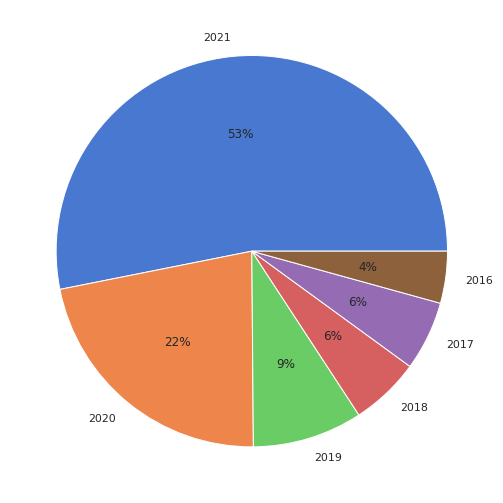

In [39]:
years = df.Start_Time.dt.year
labels = sorted(years.unique())[::-1]
colors = sns.color_palette('muted')
plt.pie(years.value_counts(), labels = labels  , autopct = '%.0f%%',colors = colors)


##### months of 2021 

In [40]:
df2021 = df[df.Start_Time.dt.year == 2021]
months_wise2021 = df2021.Start_Time.dt.month
months_df2021 = pd.crosstab(index = months_wise2021, columns = 'counts')
months_df2021.index = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
months_df2021.T

jan     feb    mar    apr    may     jun     jul     aug     sep  \
col_0                                                                         
counts  111858  114451  65639  70899  78290  117502  107345  117710  132475   

           oct     nov     dec  
col_0                           
counts  144466  185363  265747

<AxesSubplot:>

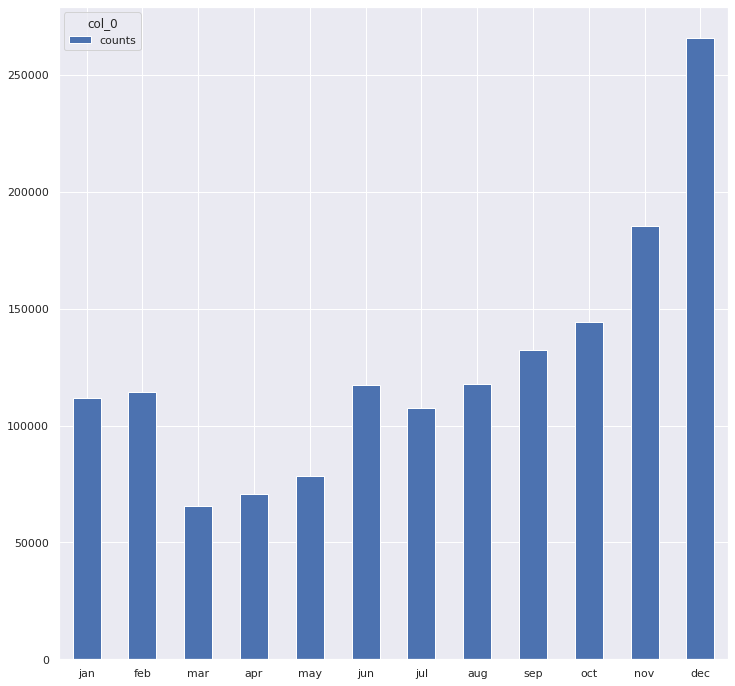

In [41]:
months_df2021.plot(kind = 'bar',figsize = (12,12),rot = 0)

#### months of 2019

In [42]:
df2019 = df[df.Start_Time.dt.year == 2019]
months_wise2019 = df2019.Start_Time.dt.month
months_df2019 = pd.crosstab(index = months_wise2019, columns = 'counts')
months_df2019.index = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
months_df2019.T

jan    feb    mar    apr    may    jun    jul    aug    sep    oct  \
col_0                                                                          
counts  17280  17597  14536  14763  14864  12942  13922  18161  33541  40694   

          nov    dec  
col_0                 
counts  19804  40511

<AxesSubplot:>

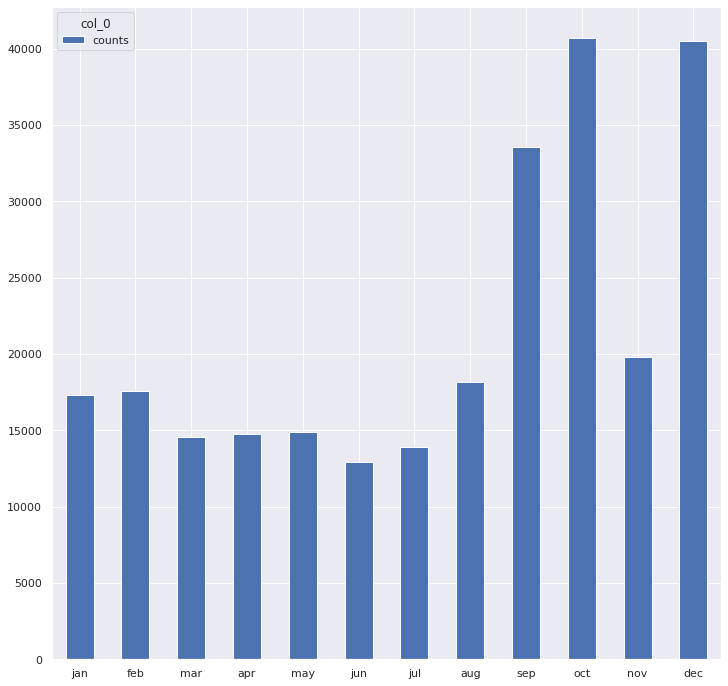

In [43]:
months_df2019.plot(kind = 'bar',figsize = (12,12),rot=0)

 #### months of 2016

In [44]:
df2016 = df[df.Start_Time.dt.year == 2016]
months_wise2016 = df2016.Start_Time.dt.month
months_df2016 = pd.crosstab(index = months_wise2016, columns = 'counts')
months_df2016.index = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
months_df2016.T

jan  feb   mar   apr   may   jun    jul    aug    sep    oct    nov  \
col_0                                                                         
counts    7  546  2398  5904  7148  9624  13903  16737  14269  16272  17381   

          dec  
col_0          
counts  17835

<AxesSubplot:>

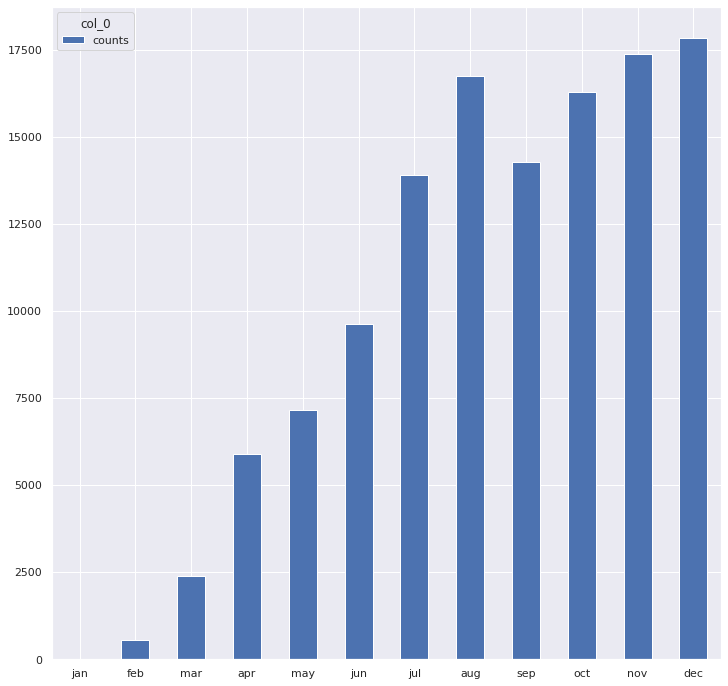

In [45]:
months_df2016.plot(kind = 'bar',figsize = (12,12),rot=0)

### 3. SEVERITY 
- Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic. (short delay)

In [46]:
new_severity = pd.Categorical(df.Severity)
new_severity = new_severity.rename_categories(['very low','low','high','very high'])
new_severity.describe()

counts     freqs
categories                   
very low      26053  0.009156
low         2532991  0.890224
high         155105  0.054512
very high    131193  0.046108

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

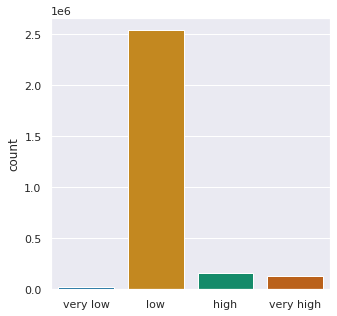

In [47]:
sns.set(rc ={'figure.figsize':(5,5)},palette = 'colorblind')
sns.countplot(new_severity).set(title='count vs severity')

#### Analysing Most Severe cases

* citywise

Miami           1580
Atlanta         1467
Orlando          927
Dallas           858
Washington       835
                ... 
Bladen             1
Lambsburg          1
Blackwater         1
Society Hill       1
Bridal Veil        1
Name: City, Length: 8660, dtype: int64


<AxesSubplot:>

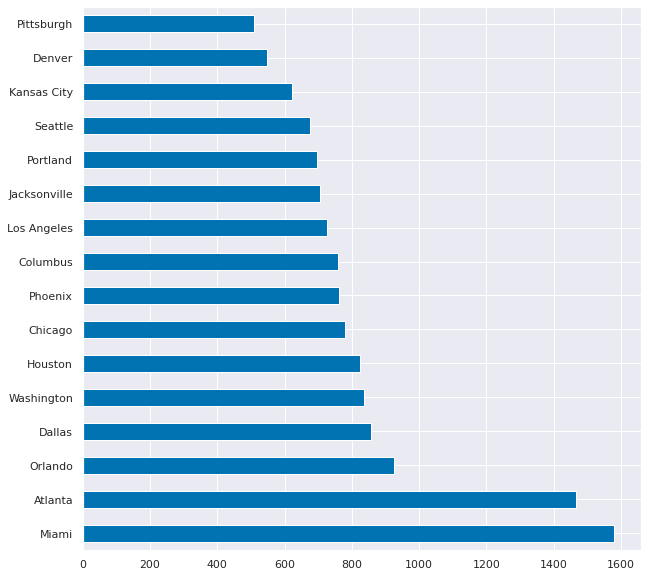

In [48]:
most_sever_cases = df[df.Severity == 4]
city_4 = most_sever_cases.City
Severe_city_counts = city_4.value_counts()
print(Severe_city_counts)
Severe_city_counts[Severe_city_counts >=500].plot(kind = 'barh',figsize = (10,10))

In [49]:
print('\n cities having more than equal to 500 severity 4 cases : \n')
print(len(Severe_city_counts[Severe_city_counts >=500]))


 cities having more than equal to 500 severity 4 cases : 

16


#### 4. START LON & START LAT

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

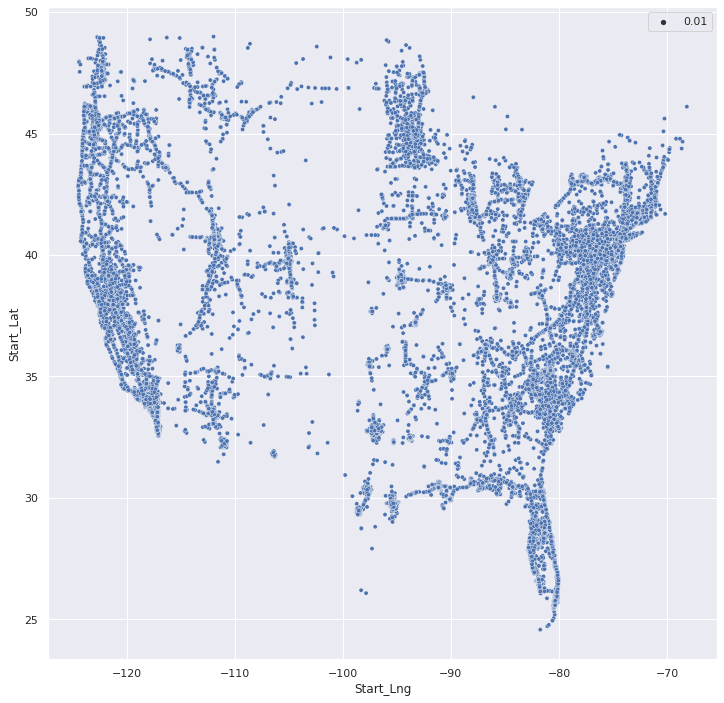

In [50]:
random_df = df.sample(frac = 0.02,random_state = 1)
sns.set(rc = {'figure.figsize' : (12,12)})
sns.scatterplot(x = random_df.Start_Lng,y = random_df.Start_Lat,size = 0.01)

In [51]:
import folium 
from folium.plugins import HeatMap
lat_lon = random_df[['Start_Lng','Start_Lat']]
maps = folium.Map(zoom_start = 6)
list_lat_lon_pairs = list(zip(list(random_df.Start_Lat),list(random_df.Start_Lng)))
HeatMap(list_lat_lon_pairs).add_to(maps)
folium.Marker()
maps

### 5. Temperature

#### Handling missing values

In [52]:
print('Number of null values in temperature : ')
print(df['Temperature(F)'].isna().sum())
print('percentage of null values in temperature : ')
print((df['Temperature(F)'].isna().sum()/len(df))*100)

Number of null values in temperature : 
69274
percentage of null values in temperature : 
2.434645817620518


Null values are less than 5% which will not cause much of data loss so lets drop those data temporarily.

#### Droping Null values

In [53]:
tempt = df['Temperature(F)'].dropna()
tempt.describe().reset_index().set_index('index')

Temperature(F)
index                
count    2.776068e+06
mean     6.179356e+01
std      1.862263e+01
min     -8.900000e+01
25%      5.000000e+01
50%      6.400000e+01
75%      7.600000e+01
max      1.960000e+02

50 percentiles of value lie between :
[76. 50.]


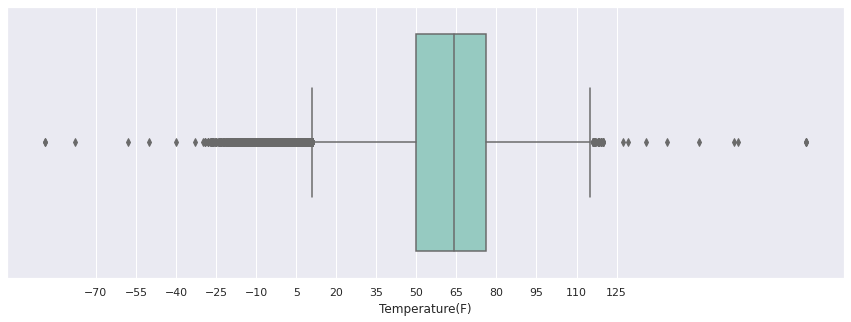

In [54]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(x = tempt,palette = 'Set3')
plt.xticks(np.arange(-70,140,15))
IQR = np.percentile(tempt,[75,25])
print('50 percentiles of value lie between :'.format(IQR))

#### Removing outliers

In [55]:
tempt.drop(tempt[tempt>134.1].index , inplace = True,axis = 0) # Highest temperature ever recoreded on earth is 134.1 F Need to drop temperature above this

we didn't removed outliers on the basis of IQR or Z-score all seemingly outliers are infact a possible values.

#### description of temperature

([<matplotlib.axis.XTick at 0x7f0d945403d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

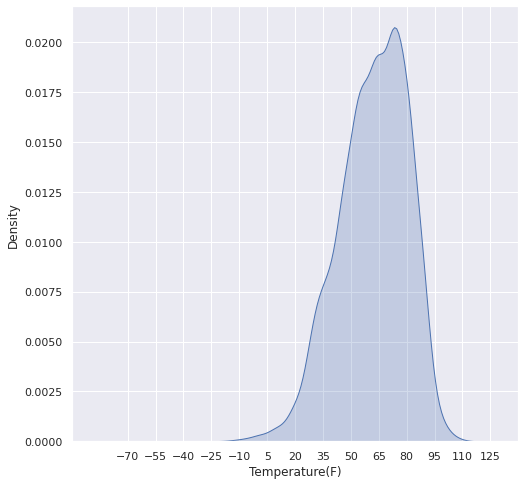

In [56]:
sns.set(rc ={'figure.figsize':(8,8)})
sns.kdeplot(tempt,cut = 0,fill =True,bw_adjust = 3)
plt.xticks(np.arange(-70,140,15))

In [57]:
print('most frequency of accident is at :',tempt.mode().values)

most frequency of accident is at : [73.]


* most of the accident happens between 50F (10 degree celsius) to 76F (24.4 degree celsius)
* most of the accident happens around 73F (22 degree celsius)

### 6. Weather

In [58]:
nn_df.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [59]:
print('No. of null values:')
print(nn_df['Weather_Condition'].isna().sum())
print('Total No. of values :')
print(len(nn_df['Weather_Condition']))
print('Percentage of null values :')
print(nn_df['Weather_Condition'].isna().sum()/len(nn_df['Weather_Condition'])*100)

No. of null values:
70636
Total No. of values :
2845342
Percentage of null values :
2.4825135256148467


Since we have large dataset we can drop nan's while doing field analysis

#### Dropping Null values and Description

In [60]:
weather = nn_df['Weather_Condition'].dropna()
weather_c_df = weather.value_counts().reset_index()
head =weather_c_df.head(10)
head.index = head['index']
del head['index']
head.columns = ['counts']
head.T

index      Fair  Mostly Cloudy  Cloudy  Partly Cloudy   Clear  Light Rain  \
counts  1107194         363959  348767         249939  173823      128403   

index   Overcast  Scattered Clouds  Light Snow    Fog  
counts     84882             45132       43752  41226

[Text(0, 0, 'Fair'),
 Text(1, 0, 'Mostly Cloudy'),
 Text(2, 0, 'Cloudy'),
 Text(3, 0, 'Partly Cloudy'),
 Text(4, 0, 'Clear'),
 Text(5, 0, 'Light Rain'),
 Text(6, 0, 'Overcast'),
 Text(7, 0, 'Scattered Clouds'),
 Text(8, 0, 'Light Snow'),
 Text(9, 0, 'Fog')]

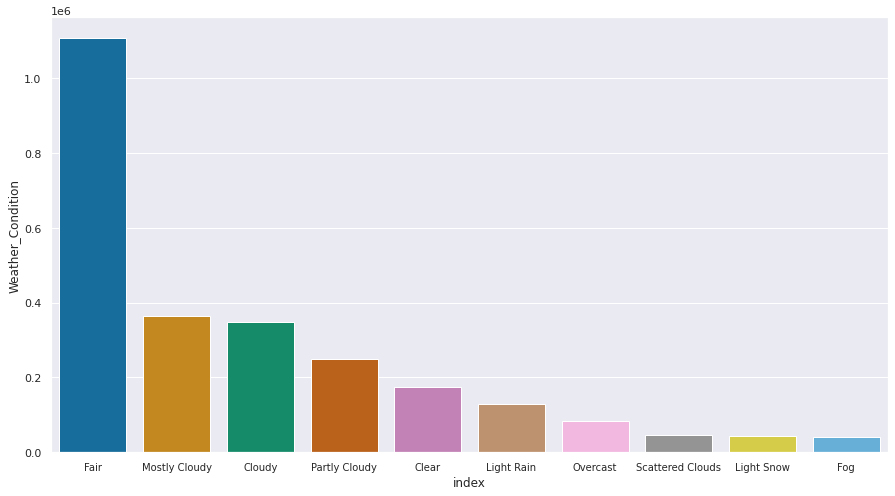

In [61]:
sns.set(rc ={'figure.figsize':(15,8)},palette = 'colorblind')
p = sns.barplot(data = weather_c_df.head(10),x='index',y='Weather_Condition')
p.set_xticklabels(p.get_xticklabels(),fontsize = 10)

In [62]:
cat_weather = pd.Categorical(weather)
others = cat_weather.value_counts().sort_values(ascending = False).iloc[10:].index
label = 'others'
cat_weather = cat_weather.add_categories([label])
cat_weather = cat_weather.replace(others,label)
w_df = pd.DataFrame(cat_weather.value_counts())
w_df.columns = ['counts']
w_df['percent'] = (w_df['counts']/sum(w_df['counts']))*100
w_df.sort_values(by = 'counts',ascending = False).T

Fair  Mostly Cloudy         Cloudy  Partly Cloudy  \
counts   1.107194e+06  363959.000000  348767.000000  249939.000000   
percent  3.990311e+01      13.117029      12.569512       9.007765   

                others          Clear     Light Rain      Overcast  \
counts   187629.000000  173823.000000  128403.000000  84882.000000   
percent       6.762122       6.264556       4.627625      3.059135   

         Scattered Clouds    Light Snow           Fog  
counts       45132.000000  43752.000000  41226.000000  
percent          1.626551      1.576816      1.485779

[Text(0, 0, 'Clear'),
 Text(1, 0, 'Cloudy'),
 Text(2, 0, 'Fair'),
 Text(3, 0, 'Fog'),
 Text(4, 0, 'Light Rain'),
 Text(5, 0, 'Light Snow'),
 Text(6, 0, 'Mostly Cloudy'),
 Text(7, 0, 'Overcast'),
 Text(8, 0, 'Partly Cloudy'),
 Text(9, 0, 'Scattered Clouds'),
 Text(10, 0, 'others')]

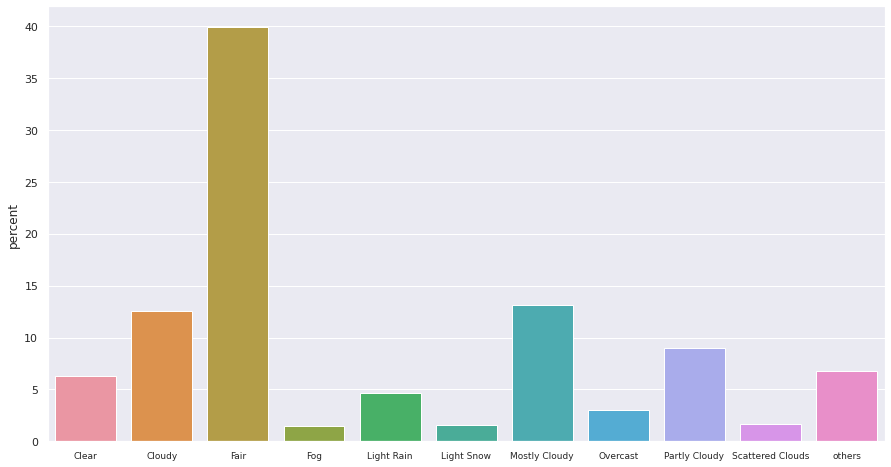

In [63]:
sns.set(rc ={'figure.figsize':(15,8)},palette = 'colorblind')
weather_plot = sns.barplot(data =w_df,x=w_df.index,y = w_df['percent'])
weather_plot.set_xticklabels(weather_plot.get_xticklabels(),fontsize = 9)

we Find-
* From above graph we could make a statment that most of the accidents happens in FAIR weather condition but look closely and you will found even in top 10 there are 4 clouds involving weather condition. Therefore this column require text working.

###  Impact of Weather Features

In [64]:
n_df = df.select_dtypes(include = np.number)
n_df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

#### Percentages of Missing values

In [65]:
w_f = n_df.iloc[0:,6:]
(w_f.isnull().sum()/len(w_f)*100).sort_values(ascending = False).reset_index() # percentage of nan values in each field 


index          0
0  Precipitation(in)  19.310789
1      Wind_Chill(F)  16.505678
2    Wind_Speed(mph)   5.550967
3        Humidity(%)   2.568830
4     Visibility(mi)   2.479350
5     Temperature(F)   2.434646
6       Pressure(in)   2.080593

In [66]:
clean_w_f = w_f.dropna()   
clean_w_f

Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0                  42.1           36.1         58.0         29.76   
4                  37.0           29.8         93.0         29.69   
7                  33.1           30.0         92.0         29.63   
9                  32.0           28.7        100.0         29.59   
10                 33.8           29.6        100.0         29.66   
...                 ...            ...          ...           ...   
2845337            86.0           86.0         40.0         28.92   
2845338            70.0           70.0         73.0         29.39   
2845339            73.0           73.0         64.0         29.74   
2845340            71.0           71.0         81.0         29.62   
2845341            79.0           79.0         47.0         28.63   

         Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
0                  10.0             10.4               0.00  
4                  10.0             10.4               0.01  
7                   0.5              3.5               0.08  
9                   0.5              3.5               0.05  
10                  3.0              4.6               0.03  
...                 ...              ...                ...  
2845337            10.0             13.0               0.00  
2845338            10.0              6.0               0.00  
2845339            10.0             10.0               0.00  
2845340            10.0              8.0               0.00  
2845341             7.0              7.0               0.00  

[2214528 rows x 7 columns]

#### Description of weather features

In [67]:
clean_w_f.describe()

Temperature(F)  Wind_Chill(F)   Humidity(%)  Pressure(in)  \
count    2.214528e+06   2.214528e+06  2.214528e+06  2.214528e+06   
mean     6.183782e+01   6.071516e+01  6.467167e+01  2.937221e+01   
std      1.857202e+01   2.052972e+01  2.272689e+01  1.092823e+00   
min     -3.300000e+01  -5.010000e+01  1.000000e+00  1.672000e+01   
25%      5.000000e+01   5.000000e+01  4.900000e+01  2.921000e+01   
50%      6.400000e+01   6.400000e+01  6.700000e+01  2.973000e+01   
75%      7.600000e+01   7.600000e+01  8.400000e+01  2.997000e+01   
max      1.960000e+02   1.960000e+02  1.000000e+02  5.890000e+01   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count    2.214528e+06     2.214528e+06       2.214528e+06  
mean     9.047350e+00     7.150716e+00       5.690400e-03  
std      2.608356e+00     5.518137e+00       5.817027e-02  
min      0.000000e+00     0.000000e+00       0.000000e+00  
25%      1.000000e+01     3.000000e+00       0.000000e+00  
50%      1.000000e+01     7.000000e+00       0.000000e+00  
75%      1.000000e+01     1.000000e+01       0.000000e+00  
max      1.000000e+02     1.087000e+03       2.400000e+01

### let,s analyze each field by box plot

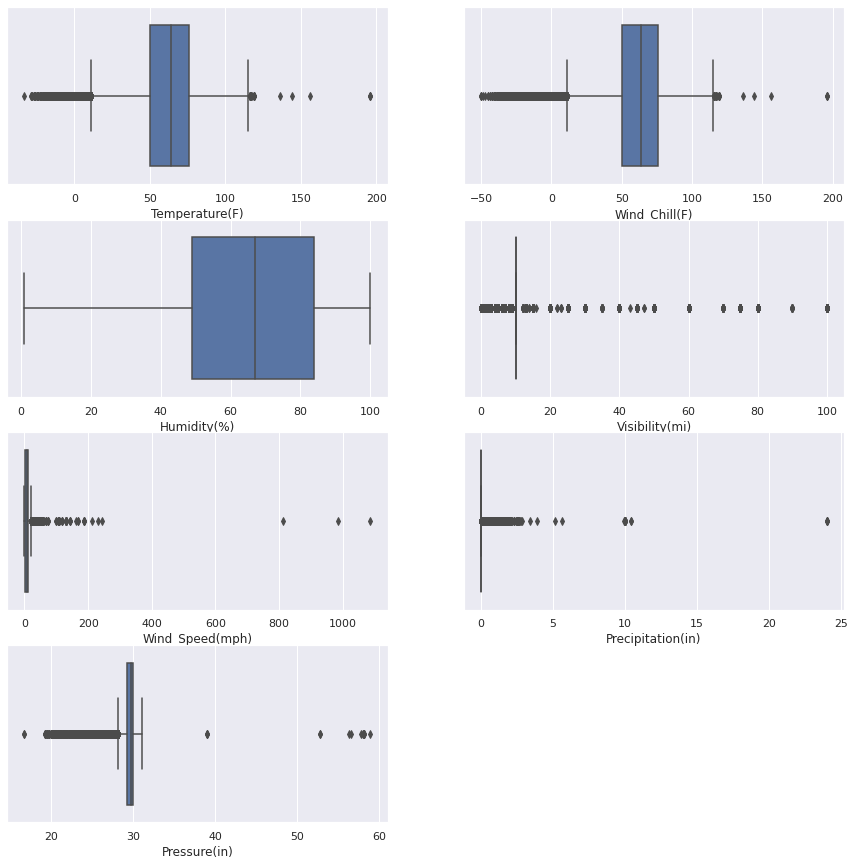

In [68]:
f,ax = plt.subplots(4,2,figsize = (15,15))
f.delaxes(ax[3,1])

sns.boxplot(x = clean_w_f['Temperature(F)'],ax = ax[0,0])
sns.boxplot(x = clean_w_f['Wind_Chill(F)'],ax = ax[0,1])
sns.boxplot(x = clean_w_f['Humidity(%)'],ax = ax[1,0])
sns.boxplot(x = clean_w_f['Visibility(mi)'],ax = ax[1,1])
sns.boxplot(x = clean_w_f['Wind_Speed(mph)'],ax = ax[2,0])
sns.boxplot(x = clean_w_f['Precipitation(in)'],ax = ax[2,1])
sns.boxplot(x = clean_w_f['Pressure(in)'],ax = ax[3,0])
plt.show()


#### Using Z - score to find the outliers.

Number of outliers on the basis of Z-score

In [69]:
import scipy.stats as stats
no_of_outlier = ((stats.zscore(clean_w_f)>3) | (stats.zscore(clean_w_f)<-3)).sum() 
no_of_outlier=no_of_outlier.reset_index().set_index('index')
no_of_outlier.columns =['number of outliers']
no_of_outlier

number of outliers
index                                
Temperature(F)                  10845
Wind_Chill(F)                   16341
Humidity(%)                         0
Pressure(in)                    81582
Visibility(mi)                  72946
Wind_Speed(mph)                 16503
Precipitation(in)               15284

In [70]:
removed_outliers = clean_w_f[(stats.zscore(clean_w_f)<3) & (stats.zscore(clean_w_f)>-3)]
removed_outliers.describe()

Temperature(F)  Wind_Chill(F)   Humidity(%)  Pressure(in)  \
count    2.203683e+06   2.198187e+06  2.214528e+06  2.132946e+06   
mean     6.214950e+01   6.125210e+01  6.467167e+01  2.953894e+01   
std      1.806861e+01   1.961936e+01  2.272689e+01  6.655099e-01   
min      6.300000e+00  -8.000000e-01  1.000000e+00  2.610000e+01   
25%      5.000000e+01   5.000000e+01  4.900000e+01  2.928000e+01   
50%      6.400000e+01   6.400000e+01  6.700000e+01  2.976000e+01   
75%      7.600000e+01   7.600000e+01  8.400000e+01  2.997000e+01   
max      1.170000e+02   1.190000e+02  1.000000e+02  3.110000e+01   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count    2.141582e+06     2.198025e+06       2.199244e+06  
mean     9.290729e+00     6.995864e+00       2.991032e-03  
std      1.856332e+00     5.087831e+00       1.551010e-02  
min      1.500000e+00     0.000000e+00       0.000000e+00  
25%      1.000000e+01     3.000000e+00       0.000000e+00  
50%      1.000000e+01     7.000000e+00       0.000000e+00  
75%      1.000000e+01     1.000000e+01       0.000000e+00  
max      1.600000e+01     2.300000e+01       1.800000e-01

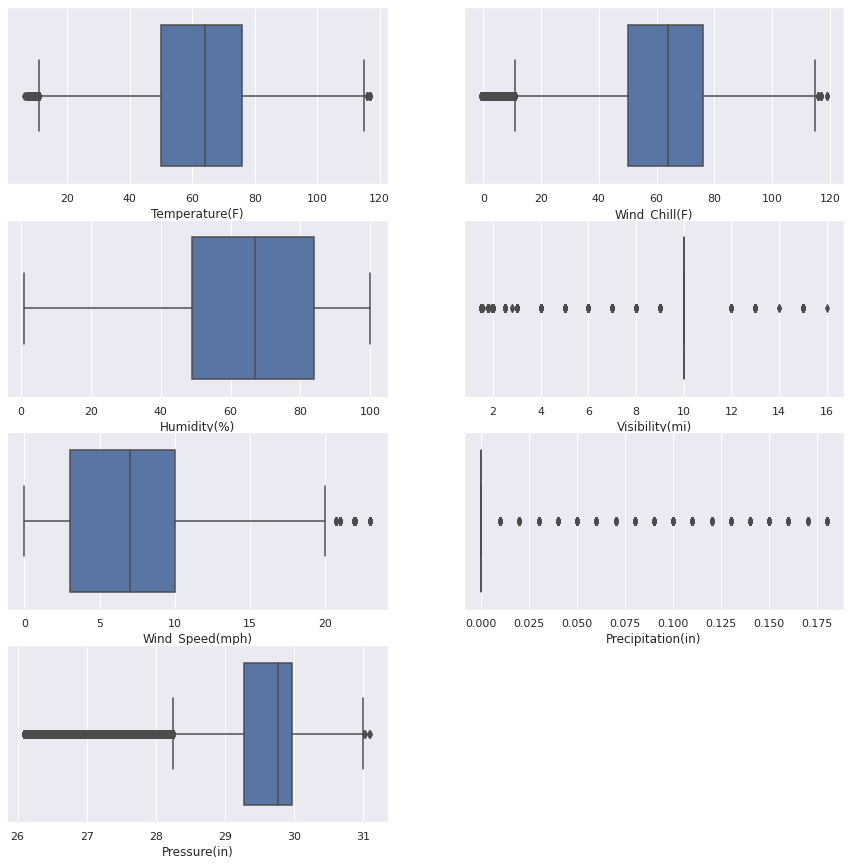

In [71]:
f,ax = plt.subplots(4,2,figsize = (15,15))
f.delaxes(ax[3,1])

sns.boxplot(x = removed_outliers['Temperature(F)'],ax = ax[0,0])
sns.boxplot(x = removed_outliers['Wind_Chill(F)'],ax = ax[0,1])
sns.boxplot(x = removed_outliers['Humidity(%)'],ax = ax[1,0])
sns.boxplot(x = removed_outliers['Visibility(mi)'],ax = ax[1,1])
sns.boxplot(x = removed_outliers['Wind_Speed(mph)'],ax = ax[2,0])
sns.boxplot(x = removed_outliers['Precipitation(in)'],ax = ax[2,1])
sns.boxplot(x = removed_outliers['Pressure(in)'],ax = ax[3,0])
plt.show()

* By decreasing Threshold from 3 we can remove even more outliers.

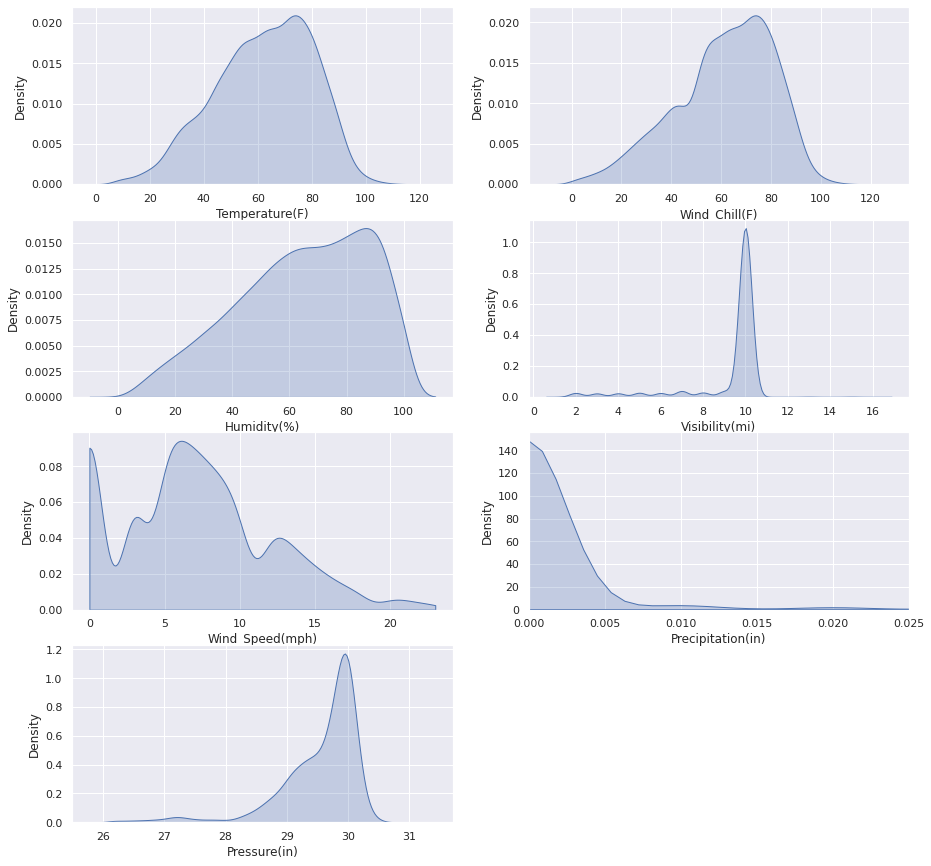

In [72]:
f,ax = plt.subplots(4,2,figsize = (15,15))
f.delaxes(ax[3,1])

sns.kdeplot(removed_outliers['Temperature(F)'],fill =True,bw_adjust = 3,ax = ax[0,0])
sns.kdeplot(removed_outliers['Wind_Chill(F)'],fill =True,bw_adjust = 3,ax = ax[0,1])
sns.kdeplot(removed_outliers['Humidity(%)'],fill =True,bw_adjust = 3,ax = ax[1,0])
sns.kdeplot(removed_outliers['Visibility(mi)'],fill =True,bw_adjust = 3,ax = ax[1,1])
sns.kdeplot(removed_outliers['Wind_Speed(mph)'],fill =True,bw_adjust = 3,ax = ax[2,0],cut = 0)      #ax[2,1].set_xlim(0,100)
sns.kdeplot(removed_outliers['Precipitation(in)'],fill =True,bw_adjust = 3,ax = ax[2,1],cut =0)
ax[2,1].set_xlim(-0.00,0.025)
sns.kdeplot(removed_outliers['Pressure(in)'],fill =True,bw_adjust = 3,ax = ax[3,0])
plt.show()


### Impact of Location Features

In [73]:
nn_df.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### Checking Null Values

In [74]:
cli_df = nn_df.iloc[0:,16:29]
cli_df.isnull().sum()

Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64

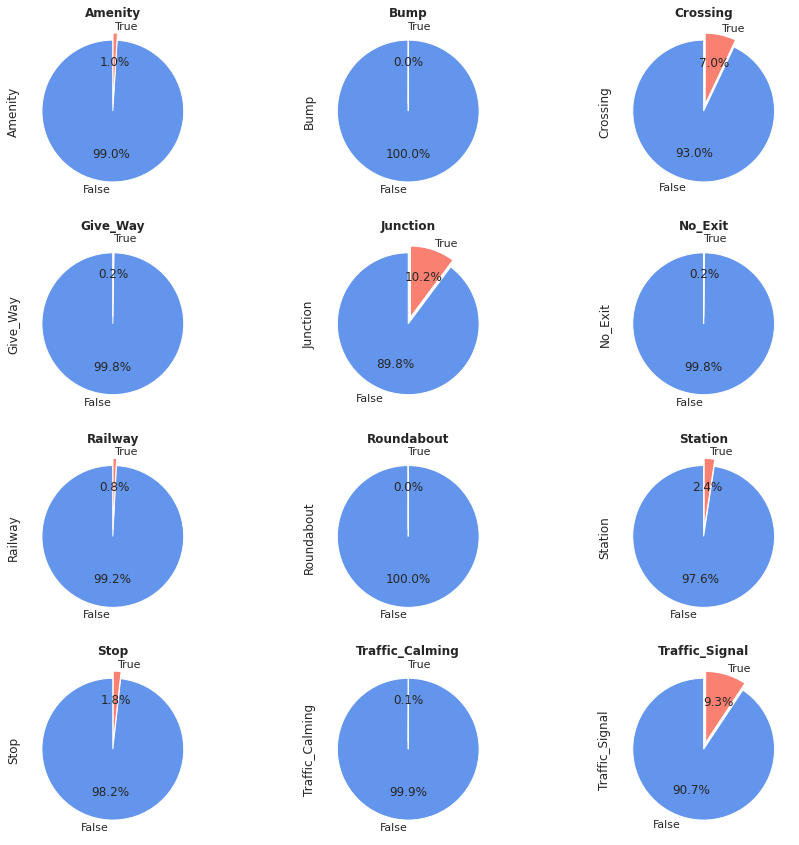

In [75]:
f,ax=plt.subplots(4,3,figsize=(15,15))
ax[0,0] = cli_df['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],startangle = 90 ,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = cli_df['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = cli_df['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = cli_df['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = cli_df['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = cli_df['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = cli_df['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = cli_df['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = cli_df['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = cli_df['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = cli_df['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = cli_df['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],startangle = 90,explode = (0,0.1),colors=["cornflowerblue","salmon"])
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")
plt.show()

## Q & A

1. Are there more accidents in harsh weather and more severe.
2. Are there more accidents in more Precipitated area.
3. Are there more accidents in warmer or colder area.
4. which 5 states has the highest number of accidents per capita.
5. Top cities of every state ?
6. Among top 100 cities in number of accidents , which states do they belong to most frequently ?
7. What time of the day accidents are more frequent ?
10. Which Days of the week most accidents occur ?
11. Which months have the more accidents ?
12. trend of accidents year over year ?
13. Trend of time of max accidents state wise ?  
14. On weekend does the accident by hour is same as weekdays ?
15. why there are more accidents in december ?
16. max and min duration for severity.
17. severity of accidents state wise
18. average duration of accident for each severity

## Summary and conclusion's

- The data was made with the prospects of traffic in mind.
- 0.6% of cities had more than 5000 accidents in a span of FEB 2016 to DEC 2021
- 4628 cities reported less than or equal to 10 accidents in a span of FEB2016 to DEC2021
- The above result shows that most of the accident happend at 17 (i.e 5 PM of day ). Also There happens to be spike in accidents in evening.
- Clearly there are less accidents in weekends
- So clearly from above comparision we can see on weekend most accident occur around 3 PM noon whereas in weekdays its around 5PM - 6PM. Also clearly there is spike in morning at weekdays which could be due to work time.
- Substantially high number of data is collected for 2021
- Almost 75% of data is from post pandemic era (2020 and 2021)
- Most of the accident happens between 50F (10 degree celsius) to 76F (24.4 degree celsius)
- Most of the accident happens around 73F (22 degree celsius)
- Only two states of U.S california and Texas accounts for almost 42% of accident